In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv("data/1000_Companies.csv")
# companies["State"] = pd.to_numeric(companies["State"], errors="coerce")
# X=companies.iloc[:, :-1].values
# y=companies.iloc[:, :4].values
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
# df.columns
df.info

<bound method DataFrame.info of      R&D Spend  Administration  Marketing Spend       State        Profit
0    165349.20      136897.800      471784.1000    New York  192261.83000
1    162597.70      151377.590      443898.5300  California  191792.06000
2    153441.51      101145.550      407934.5400     Florida  191050.39000
3    144372.41      118671.850      383199.6200    New York  182901.99000
4    142107.34       91391.770      366168.4200     Florida  166187.94000
..         ...             ...              ...         ...           ...
995   54135.00      118451.999      173232.6695  California   95279.96251
996  134970.00      130390.080      329204.0228  California  164336.60550
997  100275.47      241926.310      227142.8200  California  413956.48000
998  128456.23      321652.140      281692.3200  California  333962.19000
999  161181.72      270939.860      295442.1700    New York  476485.43000

[1000 rows x 5 columns]>

In [37]:
# print(df["column_name"].dtype) #==>to check data type
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [42]:
# create a function for ease of handle
def unique(x):
    return df[x].unique()
unique('State')

array(['New York', 'California', 'Florida'], dtype=object)

In [43]:
# data preprocessing
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [44]:
# check for duplicates
df.duplicated().sum()

1

In [45]:
# statistical analysis
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


<Axes: ylabel='Profit'>

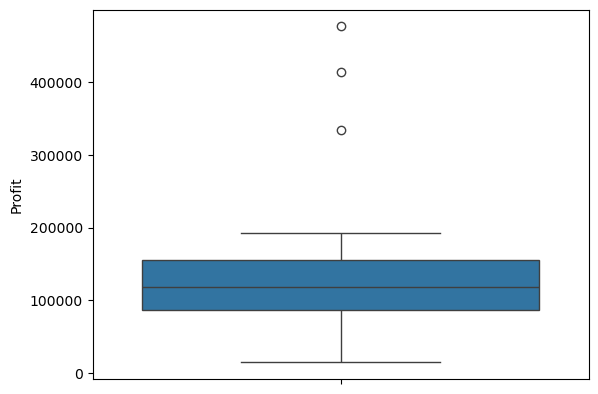

In [48]:
# Check for the outliers
sns.boxplot(data=df["Profit"])

In [49]:
# encoding using label encoder
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [51]:
label.fit(df.State)
df.State=label.transform(df.State)

In [52]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


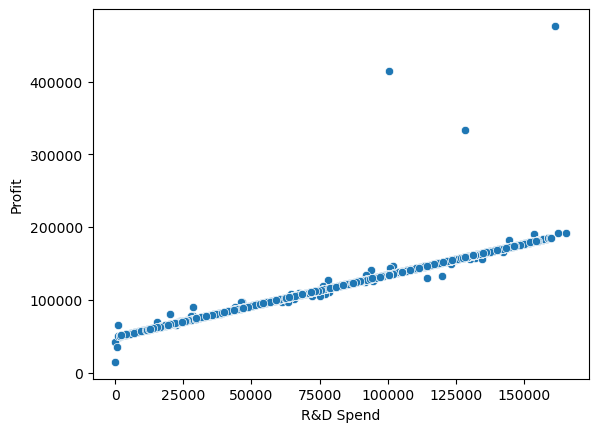

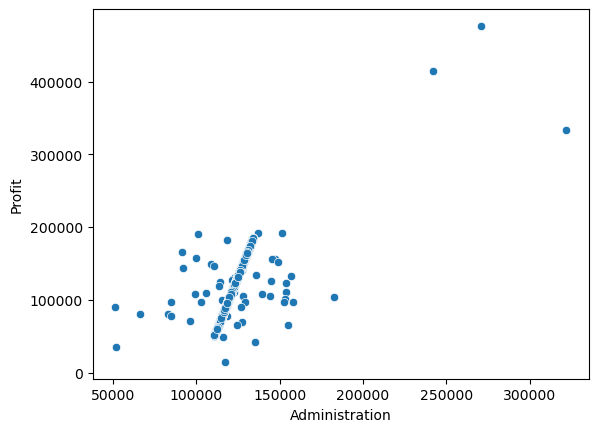

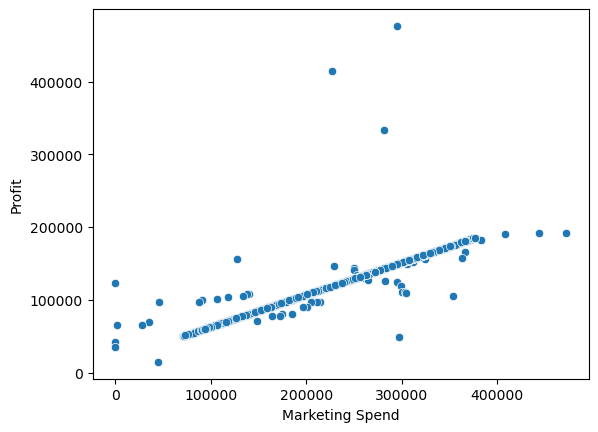

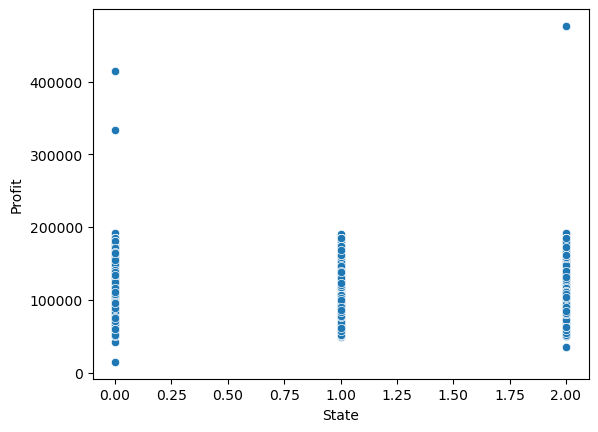

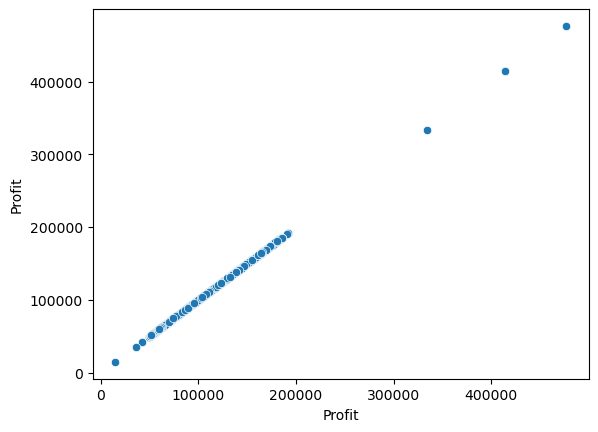

In [58]:
# Creating scatter plots for each numerical column against 'price'
for col in df:
    sns.scatterplot(data=df, x=col, y="Profit")
    plt.show()

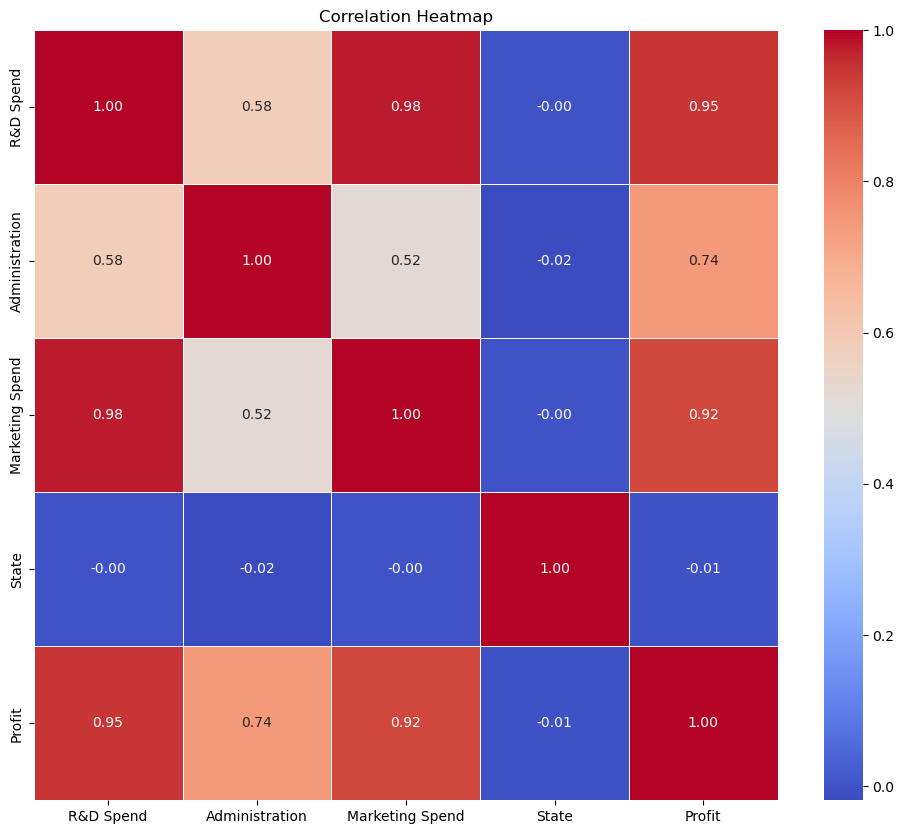

In [59]:
# Create a correlation matrix between numerical columns
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   int32  
 4   Profit           1000 non-null   float64
dtypes: float64(4), int32(1)
memory usage: 35.3 KB


In [61]:
#sort the dataset with the necessary features only.
columns_to_sort=['R&D Spend','Administration','Marketing Spend','State',
                 'Profit']

In [62]:
independent_data_for_model=df[columns_to_sort]
independent_data_for_model.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [63]:
#spliting the dataset to x(independent variables) and y(dependent variable='Price')
x=df[['R&D Spend','Administration','Marketing Spend','State']]
y=df.Profit

In [65]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [66]:
#import libraries
from sklearn.linear_model import LinearRegression
linre=LinearRegression()
linre

LinearRegression()

In [67]:
linre.fit(x,y)

LinearRegression()

In [70]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89624.88499983,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624783,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354482, 174962.79318566,
        93579.64586335,  

In [73]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [74]:
# Calculating the Intercept
print(regressor.intercept_)

-51144.72642572175


In [75]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112595959622044